In [1]:
import sys, os, cv2
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.augmentation.lib.dropout_transform import pixel_dropout, block_dropout, grid_dropout
from modules.plot.viz_annotation import draw_bbox_on_img_data

In [2]:
selected_labels, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_all_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

random_idx = np.arange(len(selected_labels))
np.random.shuffle(random_idx)
selected_labels = [selected_labels[idx] for idx in random_idx]

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0007
Sequence: 0008
Sequence: 0009
Sequence: 0010
Sequence: 0011
Sequence: 0012
Sequence: 0013
Sequence: 0014
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0018
Sequence: 0019
Sequence: 0020


## Pixel Dropout Augmentation

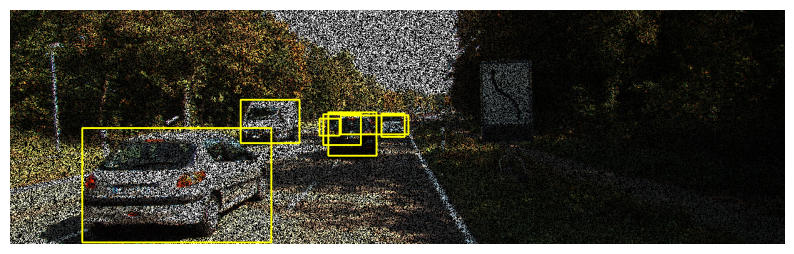

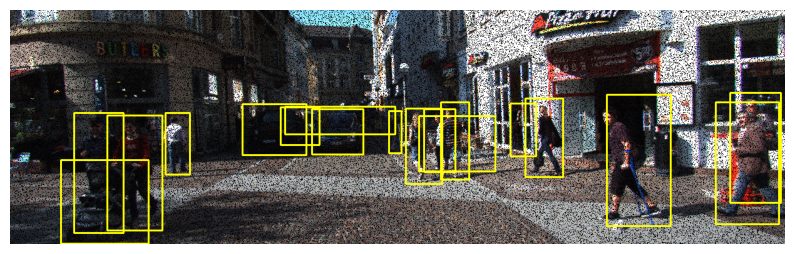

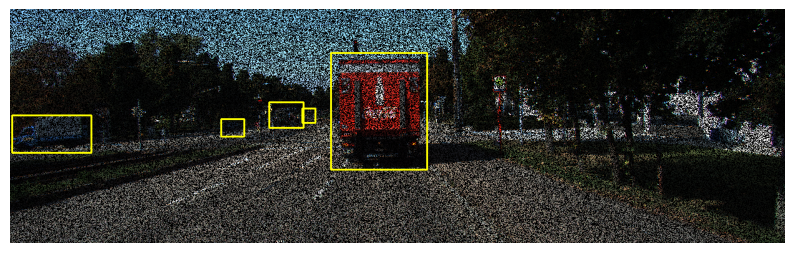

In [3]:
pixel_dropout_obj = pixel_dropout(num_min = 100000, num_max = 500000)

for i in range(3):
    img_path = selected_labels[i]['image_path']
    objCategoryid = selected_labels[i]['classid']
    boundingBox2D = selected_labels[i]['bbox']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = pixel_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))

## Block Dropout Augmentation

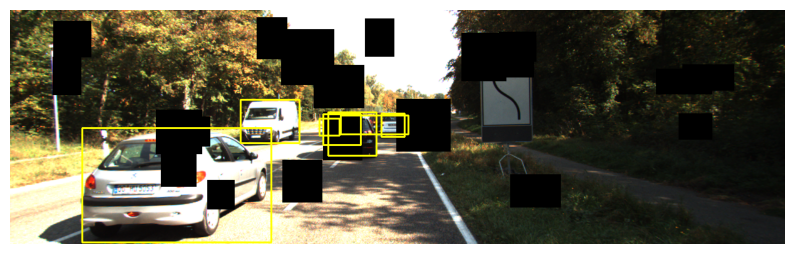

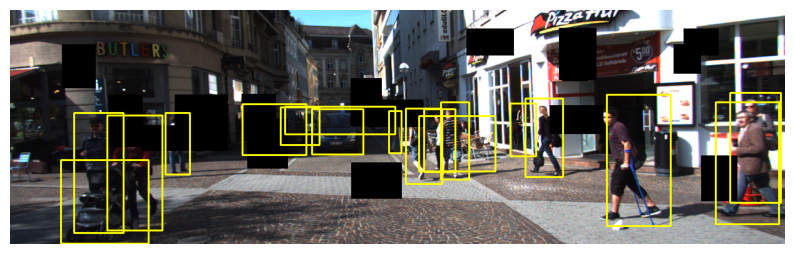

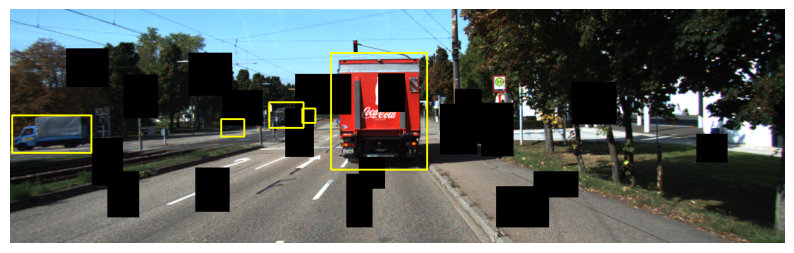

In [4]:
num_min = 10
num_max = 20
h_min = 40
h_max = 90
w_min = 40
w_max = 90

block_dropout_obj = block_dropout(
    num_min=num_min, num_max=num_max, 
    h_min=h_min, h_max=h_max,
    w_min=w_min, w_max=w_max)

for i in range(3):
    img_path = selected_labels[i]['image_path']
    objCategoryid = selected_labels[i]['classid']
    boundingBox2D = selected_labels[i]['bbox']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = block_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))

## Grid Dropout Augmentation

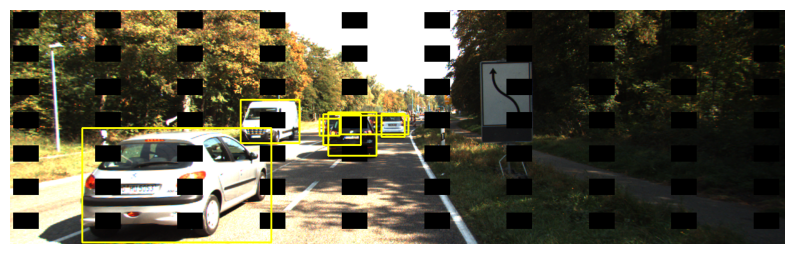

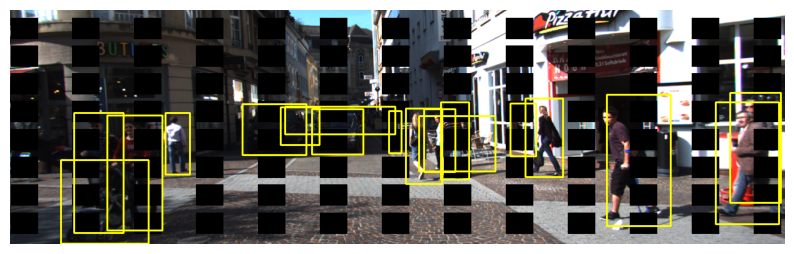

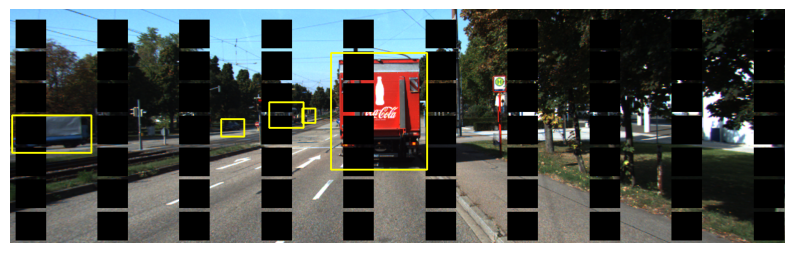

In [5]:
max_start_offset = 20
num_row_min = 5
num_row_max = 8
num_col_min = 10
num_col_max = 16
h_min = 20
h_max = 50
w_min = 20
w_max = 50

grid_dropout_obj = grid_dropout(
    max_start_offset=max_start_offset,
    num_row_min=num_row_min, num_row_max=num_row_max,
    num_col_min=num_col_min, num_col_max=num_col_max,
    h_min=h_min, h_max=h_max,
    w_min=w_min, w_max=w_max)

for i in range(3):
    img_path = selected_labels[i]['image_path']
    objCategoryid = selected_labels[i]['classid']
    boundingBox2D = selected_labels[i]['bbox']

    image_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    image_rgb = grid_dropout_obj.perform_dropout(image_rgb)
    draw_bbox_on_img_data(image_rgb, boundingBox2D, figsize=(10,8))